# BDA523- MARKETING ANALYTICS TERM PROJECT
## Group OBBS

### A.PROJECT DEFINITION

#### A.1 Overviewing Dataset

- Dataset is occured by UK based online- retail company's sales records between 2010 and 2011.([Source](https://www.kaggle.com/carrie1/ecommerce-data)) E-commerce data is not normally found in publicly available sources, as it contains customer-specific data.Thanks to "UCI Machine Learning Repository" this dataset was produced in order to be used for public usage. 

- Dataset includes 8 different columns and 541.909 rows in only one table. Description of the whole columns are explained as below:

  - **Invoice No**: Order number information produced specifically for each order.
  - **Stock Code**: Stock code of the product
  - **Description**: Product's detailled name
  - **Quantity**: Number of items purchased
  - **Invoice Date**: The date the order was placed
  - **Unit Price**: Unit price of the product
  - **Customer ID**: Unique number in the system of the customer who purchased the product
  - **Country**: Country name of the customer who purchased the product


### B. PROJECT INTRODUCTION

#### B.1 Project Goals

As the dataset comes from an e-commerce website, the main goal of the project is understand how does the customers' behaviours change? with this main goal, a RFM analysis could be beneficial for defining each customer's trend and then seperate them clusters which are defined according to their RFM based customer segmentation.  

#### B.2 Project Plan

To get successful results from project there are six steps which was assumed as shown below

a. Data Cleaning

b. Data Analysis

c. Data Visualization

d. Data Modeling

e. Cluster Labelling

f. Conclusion


#### B.3 Model/ Algorithms Planning To Use

1. RFM
2. K-Means Clustering

### C. PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import calendar


In [2]:
data = 'data.csv'
df = pd.read_csv(data, encoding = 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
#Checking if there are any missing values

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df["Amount"] = df['Quantity'] * df['UnitPrice']

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



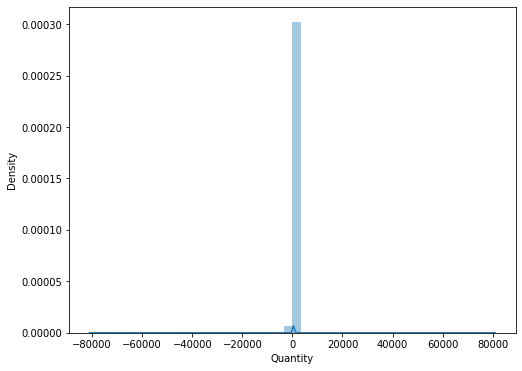

In [14]:
plt.figure(figsize=(8, 6))
sns.distplot(df["Quantity"])
plt.show()

There are some cancelled invoice in the dataset. Because of cancelled invoice datas are not in the scope of our analysis, we decided to remove these transections from our analysis via the function as showed below.

In [15]:
def remove_cancelled_transactions(df):
    trans_neg = df.Quantity < 0
    return df.loc[~(trans_neg | trans_neg.shift(-1))]

groups = [df.StockCode, df.Quantity.abs()]
df_revized = df.groupby(groups, as_index=False, group_keys=False) \
  .apply(remove_cancelled_transactions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



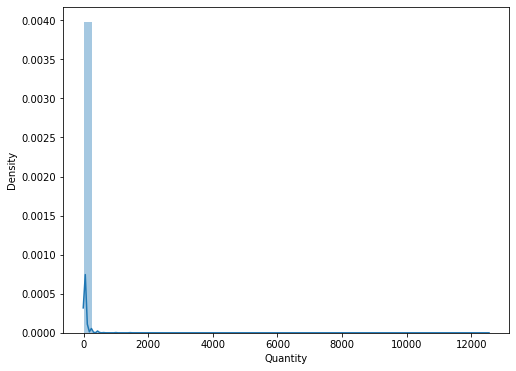

In [16]:
plt.figure(figsize=(8, 6))
sns.distplot(df_revized["Quantity"])
plt.show()

In [17]:
df_revized.Quantity.sort_values()

5466          1
213938        1
218610        1
524940        1
482449        1
          ...  
270885     3186
97432      3906
206121     4300
421632     4800
502122    12540
Name: Quantity, Length: 390855, dtype: int64

### D. EXPLORATORY DATA ANALYSIS

#### D.1. Understanding of The Dataset

The dataset is belong of the sales data between first date:  2010-12-01 08:26:00 and last date:  2011-06-23 15:26:00

In [18]:
print("first date: ", df_revized["InvoiceDate"].min(),"\n", "last date: ", df_revized["InvoiceDate"].max())

first date:  2010-12-01 08:26:00 
 last date:  2011-12-09 12:50:00


In [19]:
df_revized.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom,0.85
7598,537047,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-05 11:02:00,0.85,13069.0,United Kingdom,0.85
58503,541248,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-16 13:04:00,0.85,12748.0,United Kingdom,0.85
59184,541277,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-17 11:46:00,0.85,12673.0,Germany,0.85
81833,543179,10002,INFLATABLE POLITICAL GLOBE,1,2011-02-04 10:31:00,0.85,12754.0,Japan,0.85


In [20]:
df_revized["year"], df_revized["month"] = df_revized["InvoiceDate"].dt.year, df_revized["InvoiceDate"].dt.month

In [21]:
sales = df_revized.groupby(["year","month"])["Amount"].sum() \
.reset_index().rename({"Amount":"TotalSales"},axis=1)

sales

,year,month,TotalSales
0,2010,12,558751.170
1,2011,1,460967.550
2,2011,2,442136.000
3,2011,3,585828.410
4,2011,4,456773.411
5,2011,5,666235.250
6,2011,6,611162.020
7,2011,7,588738.231
8,2011,8,630677.430
9,2011,9,935725.102


In [22]:
new_rows = pd.DataFrame({"year":[2010,2010],
                         "month": [4,11],
                         "TotalSales": [38123.21,184980.04]},
                         index = [98,99]) # arbitrary indexes

# insert the row in the sales table
sales = pd.concat([new_rows, sales]) \
.sort_values(by=["year","month"]).reset_index(drop=True)

In [23]:
sales["month"] = sales["month"].apply(lambda x: calendar.month_abbr[x])

# combine month and year
sales["month"] = sales["month"].astype(str) + " " + sales["year"].astype(str)

# drop the redundant year column
sales = sales.drop("year", axis = 1) 

sales = sales[0:23]

In [24]:

trace = go.Scatter(
                    x = sales["month"],
                    y = sales["TotalSales"],
                    mode = "lines+markers",
                    name = "TotalSales",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(120, 26, 120, 0.8)"
                                 ),
                    hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
line_data = [trace]
layout = dict(
              title = "Total Sales by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£")
             )
fig = dict(data = line_data, layout = layout)

iplot(fig)

The sales trend during the period covered by the data set of all products on the e-commerce site is as in the chart above. The trend, which was generally on the rise at the end of 2010, seems to decrease slightly at the beginning of 2011, but continues to increase gradually towards the middle of the year with slight fluctuations throughout the year.

#### D.2. About Products

There are 3651 uniq products in this e-commerce website which are sold.

In [25]:
df_revized["StockCode"].nunique()

3651

The most populer products are shown according to their order number as below:

In [26]:
df_revized["StockCode"].value_counts().head()


85123A    1997
22423     1582
85099B    1578
84879     1399
47566     1380
Name: StockCode, dtype: int64

In [27]:
items = df_revized['Description'].value_counts().head()
print(items)

WHITE HANGING HEART T-LIGHT HOLDER    1990
REGENCY CAKESTAND 3 TIER              1582
JUMBO BAG RED RETROSPOT               1578
ASSORTED COLOUR BIRD ORNAMENT         1399
PARTY BUNTING                         1380
Name: Description, dtype: int64


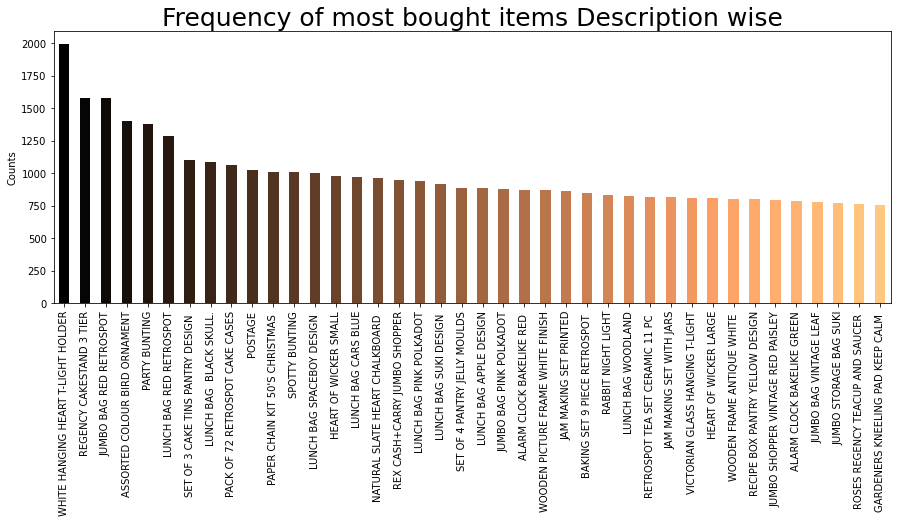

In [28]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
color = plt.cm.copper(np.linspace(0, 1, 40)) #importance: color 
df_revized['Description'].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most bought items Description wise', fontsize=25)
plt.ylabel("Counts")
plt.show()

#### D.3. Country Based Analysis

,sum
Country,
United Kingdom,4044503
Netherlands,200114
EIRE,135700
Germany,118084
France,110048


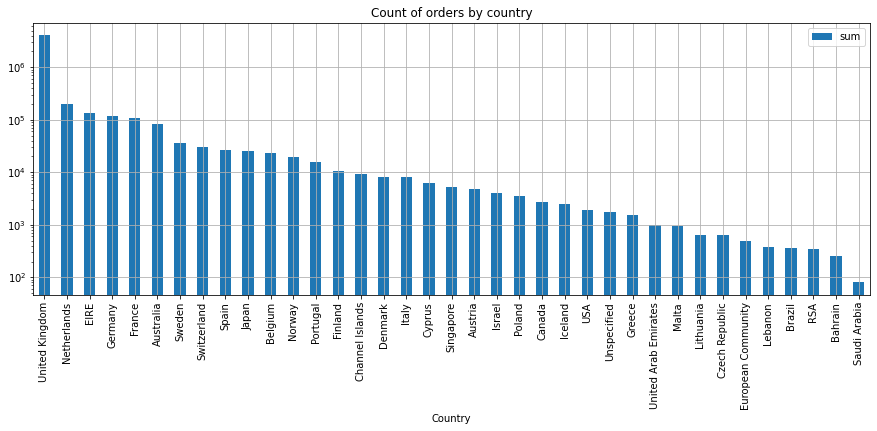

In [29]:
# orders by country
fig,ax = plt.subplots(1,1,figsize=(15,5))
stats_country = df_revized.groupby(['Country']).Quantity.agg([np.sum])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax).set_title('Count of orders by country')
plt.yscale("log")
plt.grid()

stats_country.sort_values(by='sum',ascending=False).head()

The distribution of the countries according to the products order number is as shown above. The first three countries are U.K., Netherlands and Germany.

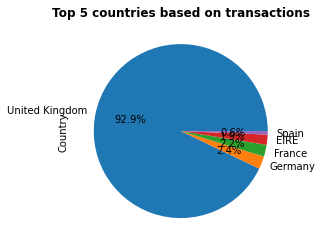

In [30]:
plt.figure()
df_revized['Country'].value_counts()[:5].plot(kind = 'pie', autopct='%1.1f%%') 
plt.title('Top 5 countries based on transactions', weight='bold') 
plt.show()

When the product numbers of the orders received on a country basis are added together, a distribution is formed as in the image above. The first 3 places are England, Netherlands and Ireland.

,sum,mean
Country,,
Australia,137702.45,123.058490
Netherlands,283986.01,121.725679
Japan,37313.72,116.970909
Singapore,19184.62,87.601005
Sweden,37839.83,85.224842


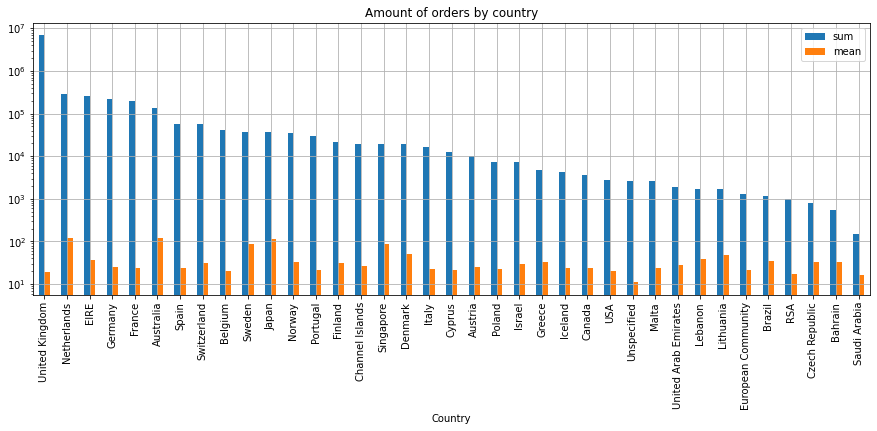

In [31]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
temp = df_revized.copy()
temp['Amount'] = temp['Quantity']*temp['UnitPrice']
stats_country = temp.groupby(['Country']).Amount.agg([np.sum, np.mean])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax).set_title('Amount of orders by country')
plt.yscale("log")
plt.grid()

stats_country.sort_values(by='mean',ascending=False).head()

When the total and average turnovers of the orders received on a country basis are examined, the graph above is formed. Despite the fact that the highest average turnover on a country basis is made in the Netherlands, the total turnover is again mostly made in England.


In [32]:
stats_cust = df_revized.groupby(['CustomerID'])
for key,value in stats_cust:
    if len(value.Country.unique()) > 1:
        print(key, value.Country.unique())

12370.0 ['Cyprus' 'Austria']
12394.0 ['Belgium' 'Denmark']
12417.0 ['Belgium' 'Spain']
12422.0 ['Australia' 'Switzerland']
12429.0 ['Austria' 'Denmark']
12431.0 ['Australia' 'Belgium']
12455.0 ['Spain' 'Cyprus']
12457.0 ['Cyprus' 'Switzerland']


Looking at the country customer number matches, a total of 8 different people were identified who ordered from more than one country.

### E. MARKETING ANALYSIS

#### RFM 

In [33]:
df_revized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390855 entries, 5466 to 22582
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    390855 non-null  object        
 1   StockCode    390855 non-null  object        
 2   Description  390855 non-null  object        
 3   Quantity     390855 non-null  int64         
 4   InvoiceDate  390855 non-null  datetime64[ns]
 5   UnitPrice    390855 non-null  float64       
 6   CustomerID   390855 non-null  float64       
 7   Country      390855 non-null  object        
 8   Amount       390855 non-null  float64       
 9   year         390855 non-null  int64         
 10  month        390855 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 45.8+ MB


In [34]:
df_revized.shape

(390855, 11)

In [35]:
df.InvoiceDate.sort_values(ascending=False).head(10)

541908   2011-12-09 12:50:00
541900   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541895   2011-12-09 12:50:00
541896   2011-12-09 12:50:00
541897   2011-12-09 12:50:00
541898   2011-12-09 12:50:00
541899   2011-12-09 12:50:00
541894   2011-12-09 12:50:00
541901   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [36]:
print("Min:{}; Max:{}".format(min(df.InvoiceDate), max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [37]:
import datetime

start_date = max(df.InvoiceDate)
start_date

Timestamp('2011-12-09 12:50:00')

In [38]:
end_date = min(df.InvoiceDate)
end_date

Timestamp('2010-12-01 08:26:00')

Snapshot date is defined as the next day of the date when the last sales was happened. 

In [39]:
snapshot_date = start_date + datetime.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [40]:
df_revized

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month
5466,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom,0.85,2010,12
7598,537047,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-05 11:02:00,0.85,13069.0,United Kingdom,0.85,2010,12
58503,541248,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-16 13:04:00,0.85,12748.0,United Kingdom,0.85,2011,1
59184,541277,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-17 11:46:00,0.85,12673.0,Germany,0.85,2011,1
81833,543179,10002,INFLATABLE POLITICAL GLOBE,1,2011-02-04 10:31:00,0.85,12754.0,Japan,0.85,2011,2
...,...,...,...,...,...,...,...,...,...,...,...
233300,557466,POST,POSTAGE,11,2011-06-20 13:08:00,18.00,13815.0,Germany,198.00,2011,6
332521,566076,POST,POSTAGE,11,2011-09-09 09:13:00,15.00,12449.0,Belgium,165.00,2011,9
134103,547822,POST,POSTAGE,16,2011-03-25 14:53:00,18.00,12668.0,Germany,288.00,2011,3
61618,541430,POST,POSTAGE,18,2011-01-18 09:50:00,18.00,12356.0,Portugal,324.00,2011,1


The uniq number of hte InvoiceNo was calculated.

In [41]:
df_revized["InvoiceNo"].nunique()

18401

In [42]:
df_revized = df_revized[df_revized["CustomerID"] != 13256]

In order to build rfm columns each column was calculated according to the formulas as below chunk.
- For each customer, InvoiceDate was calculated as snapshotdate minus the last sales date
- For each customer, Inovice No was calculated as the count of the unique ınvoice No
- For each customer, the number of amount was calculated according to their relative purchases.

In [43]:
df_rfm = df_revized.groupby("CustomerID").agg({"InvoiceDate": lambda x: (snapshot_date - x.max()).days,
                                                   "InvoiceNo": "count",
                                                   "Amount": "sum"})

In [44]:
df_rfm

,InvoiceDate,InvoiceNo,Amount
CustomerID,,,
12347.0,2,180,4280.00
12348.0,75,30,1757.24
12349.0,19,72,1457.55
12350.0,310,16,294.40
12352.0,36,81,2431.24
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [45]:
df_rfm.rename(columns={"InvoiceNo": "Frequency",
                         "InvoiceDate": "Recency",
                         "Amount": "Monetary"}, inplace=True)

In [46]:
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,180,4280.00
12348.0,75,30,1757.24
12349.0,19,72,1457.55
12350.0,310,16,294.40
12352.0,36,81,2431.24


In [47]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,4331.000000,4331.000000,4331.000000
mean,92.689910,90.245671,1945.373252
std,100.221831,223.613522,8375.993910
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,301.950000
50%,51.000000,41.000000,659.720000
75%,143.000000,98.500000,1622.160000
max,374.000000,7623.000000,278942.580000


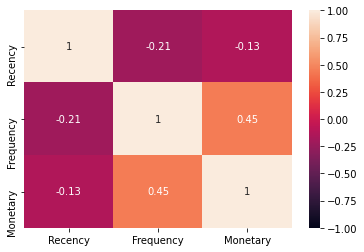

In [48]:
heatmap_all = sns.heatmap(df_rfm.corr(), vmin=-1, vmax=1, annot=True)

#### K-Means

##### Normalization

Recency, Frequence, Monetary features were tried to normalise using four different transformation methods: square root, reciprocal, log, and boxcox one by one. All process failed, but the nearest values to normal distribution are obtained thanks to boxcox method.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



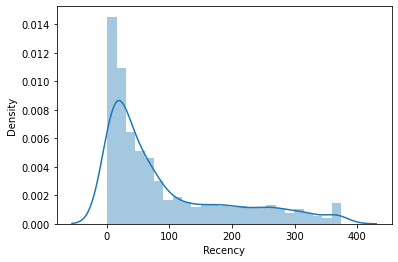

In [49]:
sns.distplot(df_rfm["Recency"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



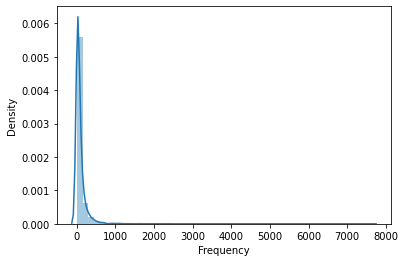

In [50]:
sns.distplot(df_rfm["Frequency"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



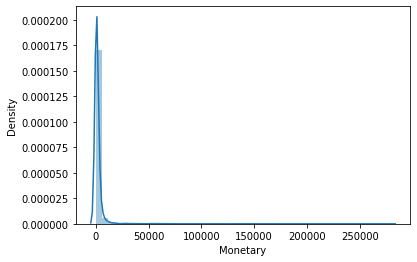

In [51]:
sns.distplot(df_rfm["Monetary"])
plt.show()

In [52]:
from scipy import stats

shapiro_Recency= stats.shapiro(df_rfm.Recency)

shapiro_Monetary= stats.shapiro(df_rfm.Monetary)

shapiro_Frequency= stats.shapiro(df_rfm.Frequency)

print("Shapiro Score of Recency: {}".format(shapiro_Recency))
print("Shapiro Score of Monetary: {}".format(shapiro_Monetary))
print("Shapiro Score of Frequency: {}".format(shapiro_Frequency))

Shapiro Score of Recency: (0.8130882978439331, 0.0)
Shapiro Score of Monetary: (0.14098083972930908, 0.0)
Shapiro Score of Frequency: (0.27598440647125244, 0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



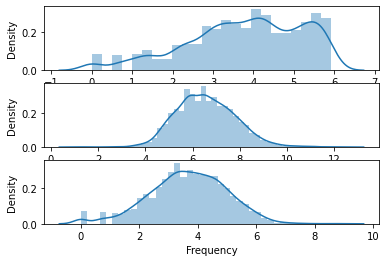

In [53]:
df_rfm_log = np.log(df_rfm)

plt.subplot(3,1,1) ; sns.distplot(df_rfm_log["Recency"])

plt.subplot(3,1,2) ; sns.distplot(df_rfm_log["Monetary"])

plt.subplot(3,1,3) ; sns.distplot(df_rfm_log["Frequency"])

In [54]:
from scipy import stats

shapiro_Recency_log= stats.shapiro(df_rfm_log.Recency)

shapiro_Monetary_log= stats.shapiro(df_rfm_log.Monetary)

shapiro_Frequency_log= stats.shapiro(df_rfm_log.Frequency)

print("Shapiro Score of Recency: {}".format(shapiro_Recency_log))
print("Shapiro Score of Monetary: {}".format(shapiro_Monetary_log))
print("Shapiro Score of Frequency: {}".format(shapiro_Frequency_log))

Shapiro Score of Recency: (0.9599775075912476, 5.536096439689137e-33)
Shapiro Score of Monetary: (0.9905696511268616, 2.1491706090190279e-16)
Shapiro Score of Frequency: (0.9941918849945068, 3.3510338601216993e-12)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



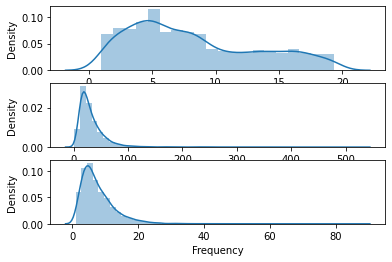

In [55]:
df_rfm_sqrt = (df_rfm)**(0.5)

plt.subplot(3,1,1) ; sns.distplot(df_rfm_sqrt["Recency"])

plt.subplot(3,1,2) ; sns.distplot(df_rfm_sqrt["Monetary"])

plt.subplot(3,1,3) ; sns.distplot(df_rfm_sqrt["Frequency"])

In [56]:
from scipy import stats
print(stats.shapiro(df_rfm_sqrt["Recency"]))
print(stats.shapiro(df_rfm_sqrt["Monetary"]))
print(stats.shapiro(df_rfm_sqrt["Frequency"]))

(0.9329583644866943, 2.1668278153854646e-40)
(0.6164582967758179, 0.0)
(0.7949080467224121, 0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



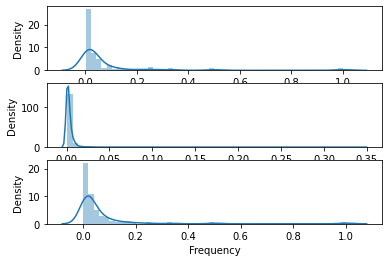

In [57]:
df_rfm_recip = 1/df_rfm

plt.subplot(3,1,1) ; sns.distplot(df_rfm_recip["Recency"])

plt.subplot(3,1,2) ; sns.distplot(df_rfm_recip["Monetary"])

plt.subplot(3,1,3) ; sns.distplot(df_rfm_recip["Frequency"])

In [58]:
from scipy import stats
print(stats.shapiro(df_rfm_recip["Recency"]))
print(stats.shapiro(df_rfm_recip["Monetary"]))
print(stats.shapiro(df_rfm_recip["Frequency"]))

(0.4384959936141968, 0.0)
(0.18096452951431274, 0.0)
(0.41758978366851807, 0.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



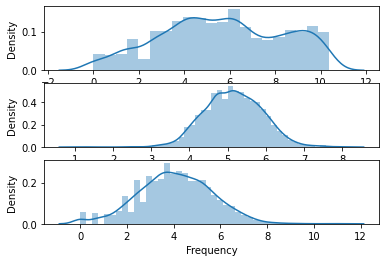

In [59]:
df_rfm_boxcox = df_rfm.copy()
from scipy.stats import boxcox
for i in df_rfm_boxcox:
  df_rfm_boxcox[i], lmbda = boxcox(df_rfm_boxcox[i], lmbda=None)

plt.subplot(3,1,1) ; sns.distplot(df_rfm_boxcox["Recency"])

plt.subplot(3,1,2) ; sns.distplot(df_rfm_boxcox["Monetary"])

plt.subplot(3,1,3) ; sns.distplot(df_rfm_boxcox["Frequency"])

In [60]:
from scipy import stats
print(stats.shapiro(df_rfm_boxcox["Recency"]))
print(stats.shapiro(df_rfm_boxcox["Monetary"]))
print(stats.shapiro(df_rfm_boxcox["Frequency"]))

(0.975763738155365, 1.5652097369281197e-26)
(0.9956958889961243, 5.968236460596188e-10)
(0.996751070022583, 4.4839200796786827e-08)


The shapiro test was used to define if the RFM columns distributed as normlize or not. Because three of them were not distributed as normalize, four different technique were tried on them to make them normalize distributed. Finally in the fourth technique of "Boxcox", the distribution seems like normalized distributed.

Min-max scaling was used to scale the RFM columns from 0 to 1.

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_rfm_boxcox)

df_rfm_normalized = scaler.transform(df_rfm_boxcox)

In [62]:
df_rfm_normalized = pd.DataFrame(data=df_rfm_normalized, index=df_rfm.index, columns=df_rfm.columns)

In [63]:
df_rfm_normalized.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,0.070892,0.526701,0.730161
12348.0,0.620312,0.329502,0.660919
12349.0,0.370486,0.423673,0.645780
12350.0,0.949954,0.264356,0.507235
12352.0,0.479334,0.436657,0.686708


In [64]:
print(df_rfm_normalized.describe().round(2))

       Recency  Frequency  Monetary
count  4331.00    4331.00   4331.00
mean      0.55       0.36      0.58
std       0.26       0.14      0.11
min       0.00       0.00      0.00
25%       0.36       0.27      0.51
50%       0.54       0.36      0.58
75%       0.76       0.46      0.65
max       1.00       1.00      1.00


##### Application of K-means

##### The Elbow Method

Firstly, the elbow method is applied with 10 options which are from 1 to 10. 3 seems like a good option, but the silhouette score graph can be clearer to determine the number of clusters.

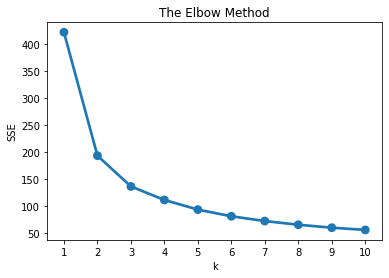

In [65]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
  kmeans.fit(df_rfm_normalized)
  sse[k] = kmeans.inertia_

plt.title("The Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [66]:
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
 
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
 
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
 
    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):
 
        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1)
        labels = kmeans.fit_predict(dataset)
 
        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
 
        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
 
        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))
 
        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(6.47,3))
 
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

##### Silhouette Score 

A silhouette score graph was plotted, and it includes the cluster numbers from 2 to 15. The graph slightly increases on 6 and 8. 

No. Clusters: 2, Silhouette Score: 0.437, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.362, Change from Previous Cluster: -0.075
No. Clusters: 4, Silhouette Score: 0.35, Change from Previous Cluster: -0.012
No. Clusters: 5, Silhouette Score: 0.314, Change from Previous Cluster: -0.036
No. Clusters: 6, Silhouette Score: 0.316, Change from Previous Cluster: 0.002
No. Clusters: 7, Silhouette Score: 0.288, Change from Previous Cluster: -0.028
No. Clusters: 8, Silhouette Score: 0.289, Change from Previous Cluster: 0.001
No. Clusters: 9, Silhouette Score: 0.287, Change from Previous Cluster: -0.002
No. Clusters: 10, Silhouette Score: 0.279, Change from Previous Cluster: -0.008
No. Clusters: 11, Silhouette Score: 0.276, Change from Previous Cluster: -0.003
No. Clusters: 12, Silhouette Score: 0.276, Change from Previous Cluster: 0.0
No. Clusters: 13, Silhouette Score: 0.267, Change from Previous Cluster: -0.009
No. Clusters: 14, Silhouette Score: 0.265, Change from Pr

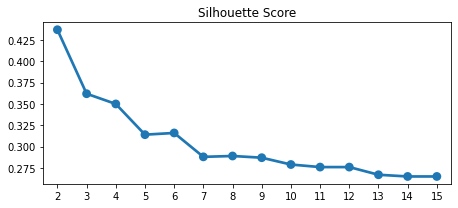

In [67]:
from sklearn.metrics import silhouette_score

optimal_kmeans(df_rfm_normalized, start=2, end=16)

In [68]:
def kmeans_pca(df, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=1)
  df_rfm_k8_stat = kmeans.fit(df)

  labels = kmeans.labels_
  centers= kmeans.cluster_centers_
  clusters= kmeans.predict(df)

  from sklearn.decomposition import PCA
  pca = PCA(n_components=2, random_state=1)
  pca.fit(df)

  df_rfm_pca = pca.transform(df)

  df_rfm_pca = pd.DataFrame(df_rfm_pca, columns=["PCA1", "PCA2"])
  df_rfm_pca["Clusters"] = clusters

  pca.fit(centers)
  centers_pca = pca.transform(centers)

  plt.figure(figsize=(14,10))
  sns.scatterplot(df_rfm_pca["PCA1"], df_rfm_pca["PCA2"], hue=clusters, s=25, palette="brg")
  sns.scatterplot(centers_pca[:, 0], centers_pca[:, 1], marker="o", s=200, alpha=0.8);

  plt.xlabel("PCA1")
  plt.ylabel("PCA2")

  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



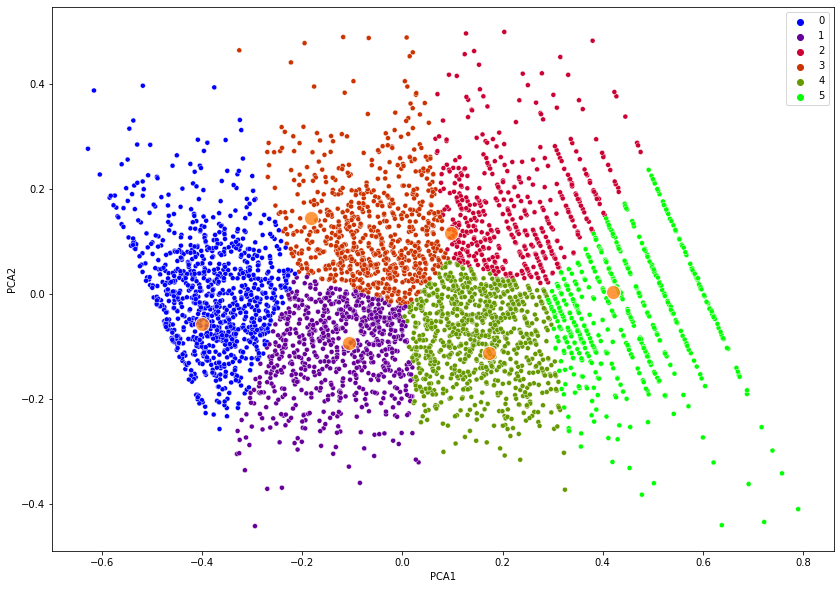

In [69]:
kmeans_pca(df_rfm_normalized, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



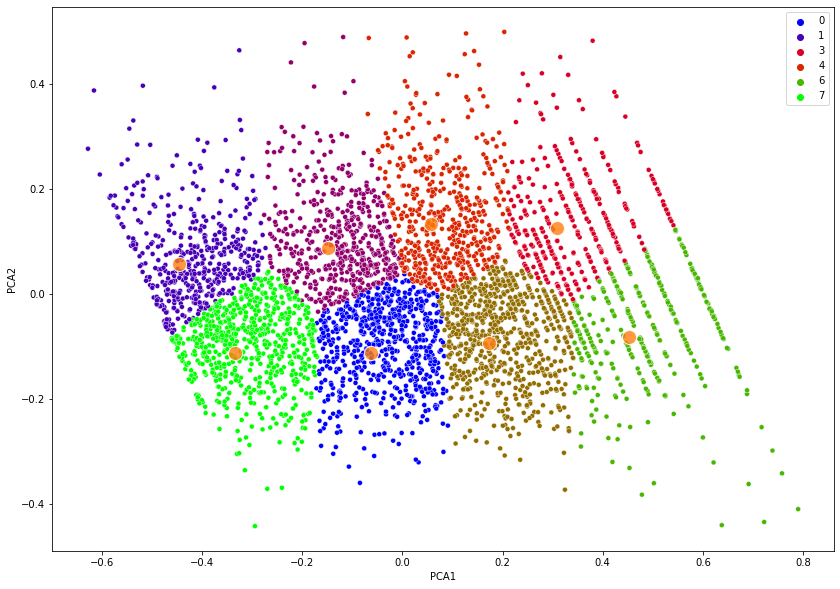

In [70]:
kmeans_pca(df_rfm_normalized, 8)

PCA method was used in order to show the dataset in 2-D graph as shown above.

In [71]:
kmeans = KMeans(n_clusters=8, n_init=20, random_state=1)
df_rfm_k8_stat = kmeans.fit(df_rfm_normalized)

In [72]:
labels = kmeans.labels_
centers= kmeans.cluster_centers_
clusters= kmeans.predict(df_rfm_normalized)

In [73]:
centers.shape

(8, 3)

In [74]:
df_rfm_normalized.shape

(4331, 3)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(df_rfm_normalized)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [76]:
df_rfm_pca = pca.transform(df_rfm_normalized)
df_rfm_pca.shape

(4331, 2)

In [77]:
df_rfm_pca = pd.DataFrame(df_rfm_pca, columns=["PCA1", "PCA2"])

In [78]:
df_rfm_pca["Clusters"] = clusters

In [79]:
df_rfm_pca

,PCA1,PCA2,Clusters
0,0.523511,-0.000597,6
1,-0.059158,-0.048110,0
2,0.195778,-0.005944,5
3,-0.418454,-0.058855,7
4,0.111527,-0.082368,5
...,...,...,...
4326,-0.420167,0.011988,1
4327,-0.355116,0.123586,1
4328,0.203173,0.284665,4
4329,0.493094,-0.129169,6


##### Visualization of Important Cluster Numbers

PCA method and pair plots were applied for all important cluster numbers.(3, 6, 8)

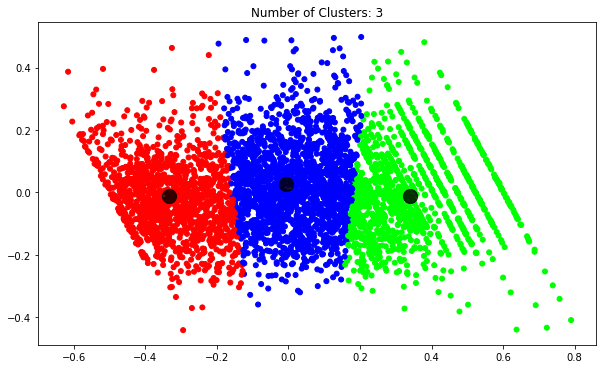

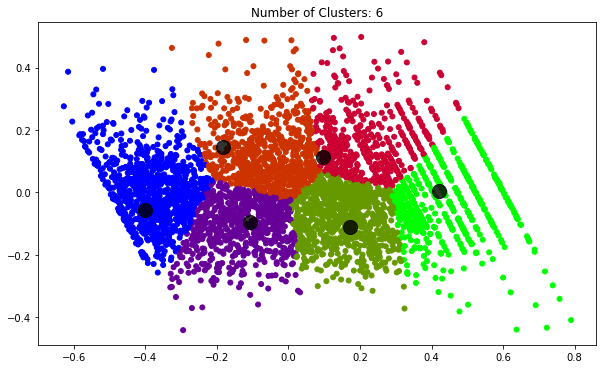

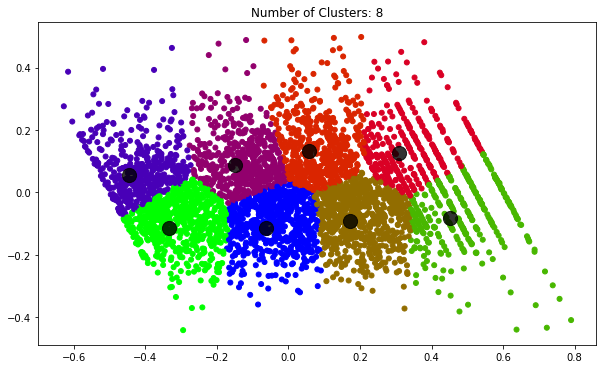

In [80]:
important_clusters = [3, 6, 8]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
  df_rfm_k = kmeans.fit(df_rfm_normalized)

  centers= kmeans.cluster_centers_
  clusters= kmeans.predict(df_rfm_normalized)

  from sklearn.decomposition import PCA
  pca = PCA(n_components=2, random_state=1)
  pca.fit(df_rfm_normalized)

  df_rfm_pca = pca.transform(df_rfm_normalized)
 

  df_rfm_pca = pd.DataFrame(df_rfm_pca, columns=["PCA1", "PCA2"])
  df_rfm_pca["Clusters"] = clusters

  pca.fit(centers)
  centers_pca = pca.transform(centers)
  

  plt.figure(figsize=(10,70))
  plt.subplot(10,1,i)
  plt.scatter(df_rfm_pca["PCA1"], df_rfm_pca["PCA2"], c=clusters, s=25, cmap='brg')
  plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker="o", s=200, alpha=0.8)


  plt.title('Number of Clusters: {}'.format(i))

After comparing the graphs between the clusters of 3,6 and 8, it was understand that there is more accurate and explainable plots in the number of 8 clusters graph. Therefore, in this project 8 is defined as the number of clusters for the dataset.

##### Pair Plots

With the aim of defining exact labels for whole clusters, another k-means analysis was worked as shown below chunk to get the better understanding of the RFM clusters. These graphs shows our pair plots for
- Monetary- Recency
- Monetary-Frequency
- Recency-Frequency

In [81]:
df_rfm_normalized_multiple = df_rfm_normalized.copy()

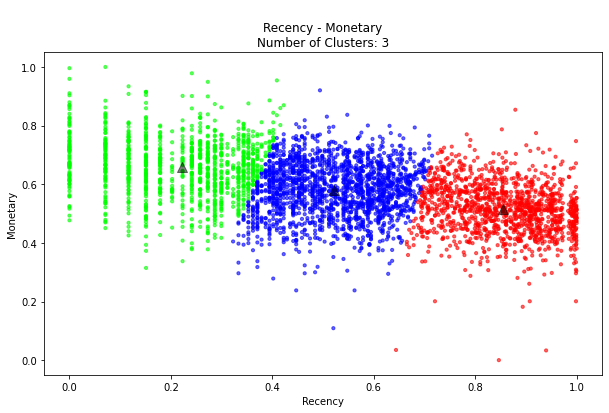

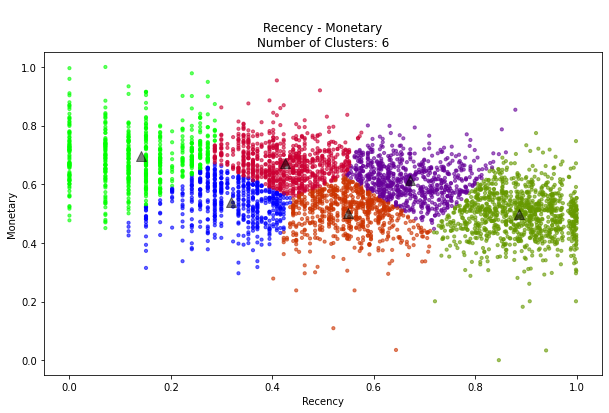

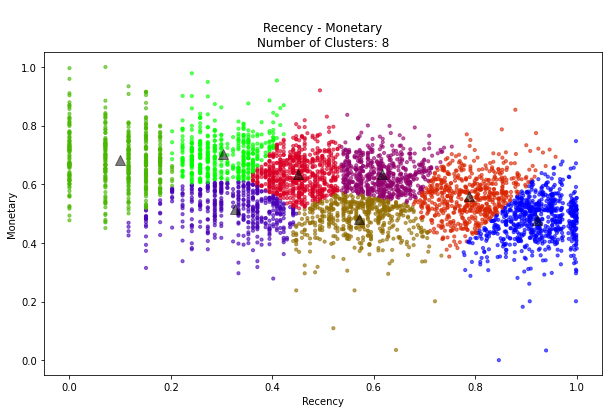

In [82]:
# k means
important_clusters = [3, 6, 8]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, random_state=1)
  df_rfm_normalized_multiple['cluster'] = kmeans.fit_predict(df_rfm_normalized[['Recency', 'Monetary']])
  clusters= kmeans.predict(df_rfm_normalized[['Recency', 'Monetary']])

  # get centroids
  centroids = kmeans.cluster_centers_
  cen_x = [j[0] for j in centroids] 
  cen_y = [j[1] for j in centroids]

  ## add to df_rfm_normalized_multiple
  df_rfm_normalized_multiple['cen_x'] = df_rfm_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
  df_rfm_normalized_multiple['cen_y'] = df_rfm_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

  #####PLOT#####
  plt.figure(figsize=(10,70))
  plt.subplot(10,1,i)

  plt.scatter(df_rfm_normalized_multiple.Recency, df_rfm_normalized_multiple.Monetary, c=clusters, cmap="brg", alpha = 0.6, s=10)
  
  plt.scatter(cen_x, cen_y, marker='^', c="black", s=100, alpha=0.5)
 
  # title and labels
  plt.title('\nRecency - Monetary\nNumber of Clusters: {}'.format(i))
  plt.xlabel('Recency')
  plt.ylabel('Monetary')

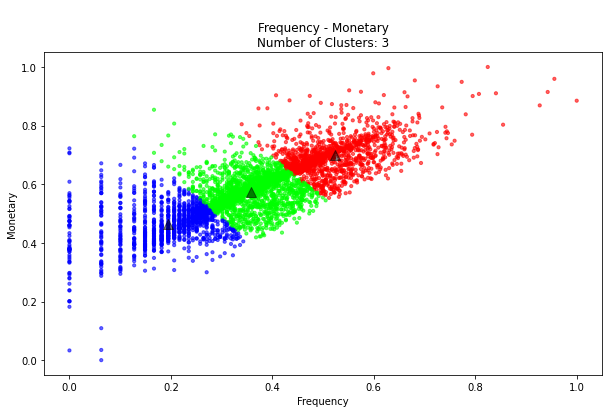

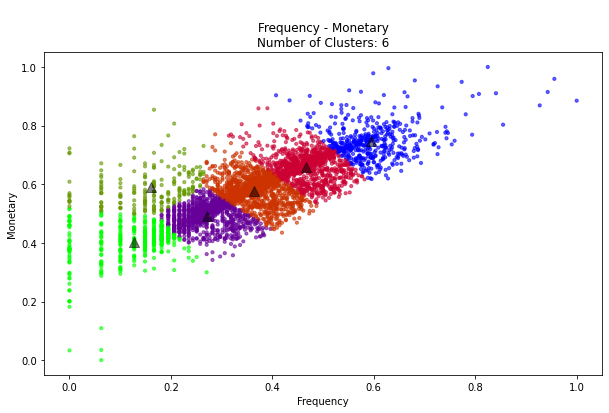

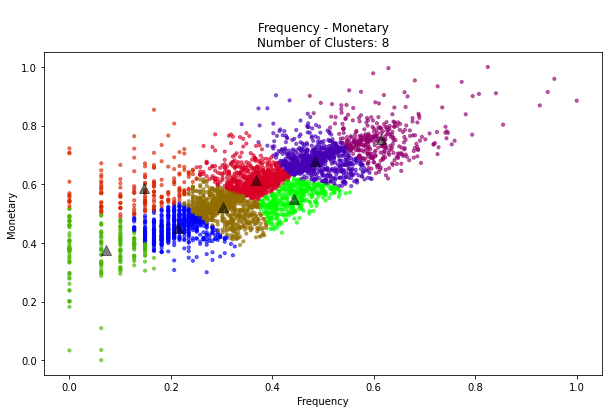

In [83]:
# k means
important_clusters = [3, 6, 8]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, random_state=1)
  df_rfm_normalized_multiple['cluster'] = kmeans.fit_predict(df_rfm_normalized[['Frequency', 'Monetary']])
  clusters= kmeans.predict(df_rfm_normalized[['Frequency', 'Monetary']])

  # get centroids
  centroids = kmeans.cluster_centers_
  cen_x = [j[0] for j in centroids] 
  cen_y = [j[1] for j in centroids]

  ## add to df_rfm_normalized_multiple
  df_rfm_normalized_multiple['cen_x'] = df_rfm_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
  df_rfm_normalized_multiple['cen_y'] = df_rfm_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

  #####PLOT#####
  plt.figure(figsize=(10,70))
  plt.subplot(10,1,i)

  plt.scatter(df_rfm_normalized_multiple.Frequency, df_rfm_normalized_multiple.Monetary, c=clusters, cmap="brg", alpha = 0.6, s=10)
  
  plt.scatter(cen_x, cen_y, marker='^', c="black", s=100, alpha=0.5)
 
  # title and labels
  plt.title('\nFrequency - Monetary\nNumber of Clusters: {}'.format(i))
  plt.xlabel('Frequency')
  plt.ylabel('Monetary')

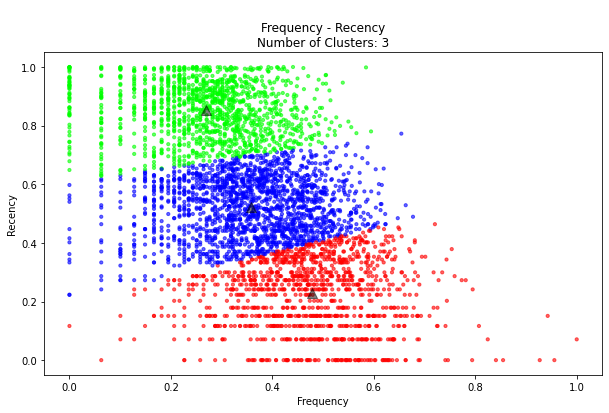

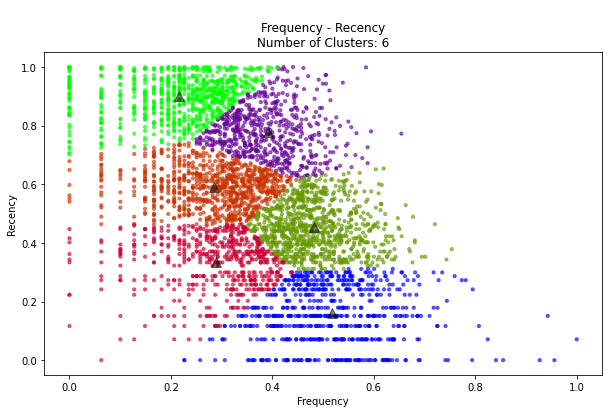

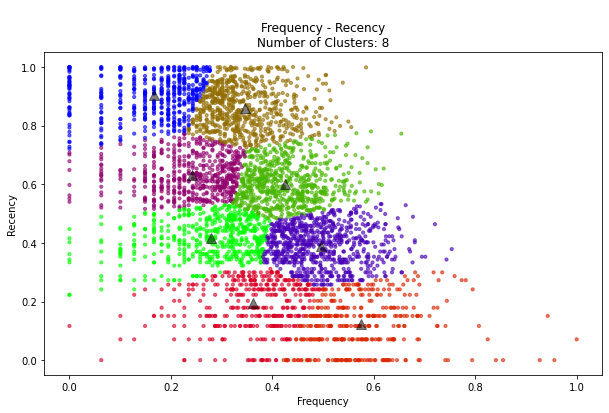

In [84]:
# k means
important_clusters = [3, 6, 8]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, random_state=1)
  df_rfm_normalized_multiple['cluster'] = kmeans.fit_predict(df_rfm_normalized[['Frequency', 'Recency']])
  clusters= kmeans.predict(df_rfm_normalized[['Frequency', 'Recency']])

  # get centroids
  centroids = kmeans.cluster_centers_
  cen_x = [j[0] for j in centroids] 
  cen_y = [j[1] for j in centroids]

  ## add to df_rfm_normalized_multiple
  df_rfm_normalized_multiple['cen_x'] = df_rfm_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
  df_rfm_normalized_multiple['cen_y'] = df_rfm_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

  #####PLOT#####
  plt.figure(figsize=(10,70))
  plt.subplot(10,1,i)

  plt.scatter(df_rfm_normalized_multiple.Frequency, df_rfm_normalized_multiple.Recency, c=clusters, cmap="brg", alpha = 0.6, s=10)
  
  plt.scatter(cen_x, cen_y, marker='^', c="black", s=100, alpha=0.5)
 
  # title and labels
  plt.title('\nFrequency - Recency\nNumber of Clusters: {}'.format(i))
  plt.xlabel('Frequency')
  plt.ylabel('Recency')

In [85]:
df_rfm_k8_stat = df_rfm.assign(Cluster = labels)

In [86]:
df_rfm_k8_stat.groupby(["Cluster"]).agg({
    "Recency": ["mean", "std"],
    "Monetary": ["mean", "std"],
    "Frequency": ["mean", "std", "count"],
}).round(0)

Recency       Monetary          Frequency             
           mean   std     mean      std      mean    std count
Cluster                                                       
0          79.0  28.0   1521.0   1307.0      84.0   59.0   668
1         259.0  71.0    209.0    261.0       8.0    5.0   463
2          76.0  24.0    376.0    366.0      16.0   10.0   531
3           6.0   3.0   1071.0   1043.0      56.0   35.0   355
4          25.0   9.0    461.0    450.0      26.0   16.0   549
5          24.0   9.0   3067.0   6148.0     160.0  118.0   734
6           5.0   3.0  10295.0  25687.0     398.0  648.0   367
7         231.0  67.0    679.0   1204.0      38.0   30.0   664

In [87]:
df_rfm_normalized_k8 = df_rfm_normalized.copy()

In [88]:
df_rfm_normalized_k8["Cluster"] = df_rfm_k8_stat["Cluster"]

In [89]:
df_rfm_melt = pd.melt(df_rfm_normalized_k8.reset_index(),
                        id_vars= ["CustomerID", "Cluster"],
                        value_vars= ["Recency", "Monetary", "Frequency"],
                        var_name= "Attribute",
                        value_name= "Value") 

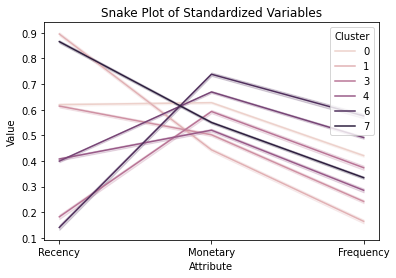

In [90]:
plt.title("Snake Plot of Standardized Variables")
sns.lineplot(x="Attribute", y="Value", hue="Cluster", data=df_rfm_melt)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



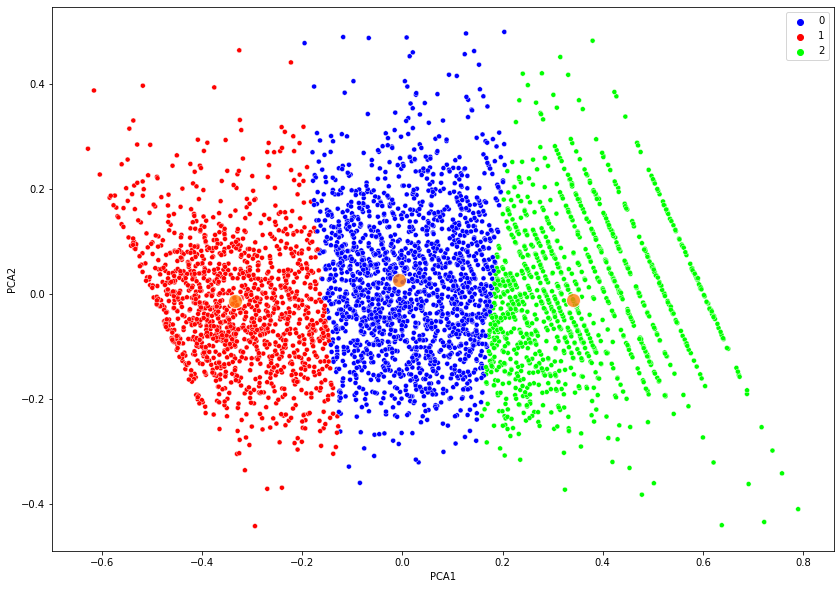

			Number of Cluster 3

        Recency       Monetary                    Frequency             
           mean   std     mean      std       max      mean    std count
Cluster                                                                 
0          51.0  26.0   1025.0   1274.0   19185.0      57.0   59.0  1844
1         225.0  79.0    509.0    948.0   24851.0      27.0   31.0  1313
2          10.0   8.0   4998.0  15571.0  278943.0     213.0  396.0  1174




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



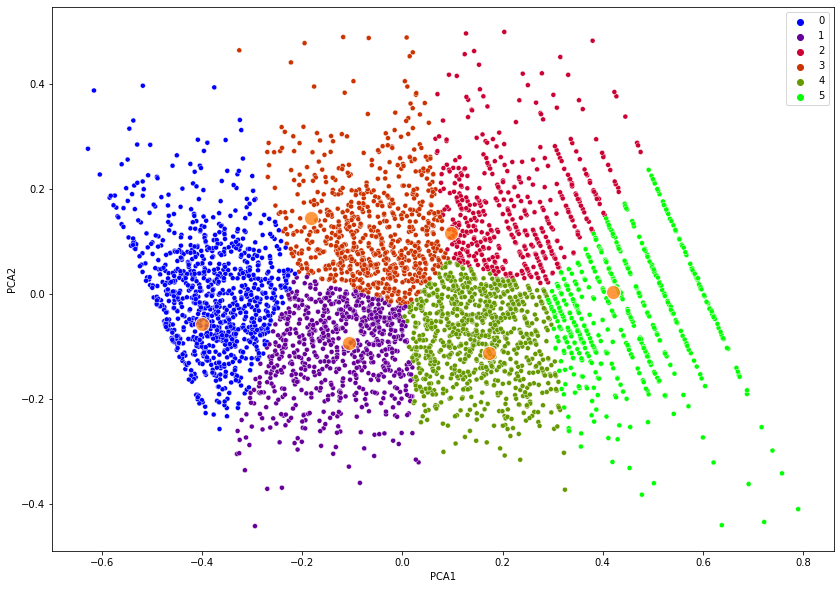

			Number of Cluster 6

        Recency       Monetary                    Frequency             
           mean   std     mean      std       max      mean    std count
Cluster                                                                 
0         253.0  69.0    349.0    864.0   24851.0      17.0   14.0   935
1         121.0  53.0   1279.0   1254.0   11276.0      69.0   52.0   709
2          12.0   6.0    716.0    893.0   12394.0      35.0   22.0   511
3          56.0  23.0    394.0    393.0    4507.0      19.0   13.0   761
4          32.0  14.0   2676.0   5585.0  124332.0     143.0  108.0   863
5           5.0   4.0   7640.0  21339.0  278943.0     309.0  546.0   552




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



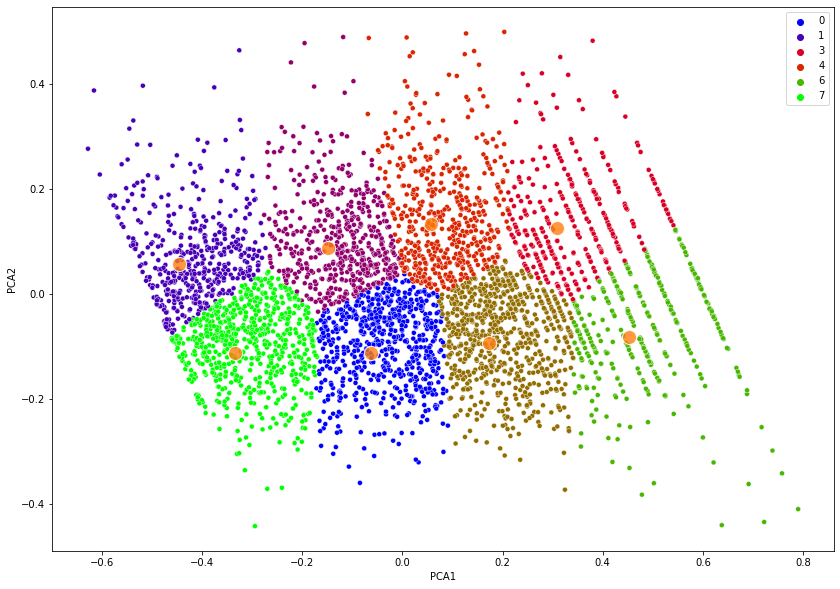

			Number of Cluster 8

        Recency       Monetary                    Frequency             
           mean   std     mean      std       max      mean    std count
Cluster                                                                 
0          79.0  28.0   1521.0   1307.0   11276.0      84.0   59.0   668
1         259.0  71.0    209.0    261.0    3203.0       8.0    5.0   463
2          76.0  24.0    376.0    366.0    4507.0      16.0   10.0   531
3           6.0   3.0   1071.0   1043.0   12394.0      56.0   35.0   355
4          25.0   9.0    461.0    450.0    6749.0      26.0   16.0   549
5          24.0   9.0   3067.0   6148.0  124332.0     160.0  118.0   734
6           5.0   3.0  10295.0  25687.0  278943.0     398.0  648.0   367
7         231.0  67.0    679.0   1204.0   24851.0      38.0   30.0   664




In [91]:
important_clusters = [3, 6, 8]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
  df_rfm_k = kmeans.fit(df_rfm_normalized)

  labels = kmeans.labels_
  centers= kmeans.cluster_centers_
  clusters= kmeans.predict(df_rfm_normalized)

  from sklearn.decomposition import PCA
  pca = PCA(n_components=2, random_state=1)
  pca.fit(df_rfm_normalized)

  df_rfm_pca = pca.transform(df_rfm_normalized)

  df_rfm_pca = pd.DataFrame(df_rfm_pca, columns=["PCA1", "PCA2"])
  df_rfm_pca["Clusters"] = clusters

  pca.fit(centers)
  centers_pca = pca.transform(centers)

  plt.figure(figsize=(14,10))
  sns.scatterplot(df_rfm_pca["PCA1"], df_rfm_pca["PCA2"], hue=clusters, s=25, palette="brg")
  sns.scatterplot(centers_pca[:, 0], centers_pca[:, 1], marker="o", s=200, alpha=0.8);

  plt.xlabel("PCA1")
  plt.ylabel("PCA2")

  plt.show()

  df_rfm_k = df_rfm.assign(Cluster = labels)

  df_rfm_summary = df_rfm_k.groupby(["Cluster"]).agg({
    "Recency": ["mean", "std"],
    "Monetary": ["mean", "std", "max",],
    "Frequency": ["mean", "std", "count"],
  }).round(0)

  print('\t\t\tNumber of Cluster {}\n'.format(i))
  print(df_rfm_summary)
  print("\n")

##### Determination of Cluster Labels

After a plenty of trials, cluster labels are determined based on the visualizations(2-D, Snake and Pair Plots) above and statistical values.

##### The Labels of Clusters for 8

*   Cluster 0: Need Attention
*   Cluster 1: Churn
*   Cluster 2: Potential Churn
*   Cluster 3: Potential VIP Candidate Customers
*   Cluster 4: Sleepy Customers
*   Cluster 5: VIP Candidate Customers
*   Cluster 6: VIP Customers
*   Cluster 7: Not Satisfied Customers

### CONCLUSION & KEY TAKEAWAYS

As a result of all the studies and analyzes, you can find our action suggestions for the following groups.

 - **Cluster 0**, has the second largest number of customers(668) in almost all data. Compared to other groups, it has a monetary value (1521) above the average. Considering the frequency of this group's visit to the site and the 79-day period since the last visit, it can be said that it is a cluster that **needs attention**. In addition, it will be beneficial to allocate a budget to this group when planning marketing activities.
 - **Cluster 1**, can be characterized as a group of **churn** customers, considering the average last visit value(259) and the frequency of visits(8).
 - Customers included in **Cluster 2** visit the site less than customers in other groups (Recency: 16). In addition, it can be said that this group is also a **potential churn** group considering their relatively low average monetary value(376) and the fact that they have not visited for a certain period of time.
 - **Cluster 3** can be considered as a permanent lead for the site, considering the average frequency of visiting the site(56), monetary(1071) and last shopping time(6). Considering the average monetary figure, it can also be called a **VIP candidate** for the future, and in this context, marketing activities can be evaluated for this group of customers.
 - We defined the customers in the **Cluster 4** group as **the sleepy customer** group. The most important reason for this is that the average monetary number is quite low (461) and the frequency of visiting the site is below the average (16) of other clusters. It may be useful to attract the attention of customers in this group, but the amount of spending they spend can still be considered as an indicator of not much potential.
 - **Cluster 5** can be considered as the second most important group for the site, considering the frequency of visiting the site and the monetary figures. Customers in this group can be attracted to the site again with a marketing campaign that can be done due to the fact that they have done a little shopping recently, and become permanent VIP customers.
 - **Cluster 6** is the group of customers with the highest average monetary and frequency that can be defined as **VIP customers** for the site. It is the most important group for the site and should be given attention because the largest proportion of revenue comes from here.
 - Customers in the **Cluster 7** group are a group of customers who used to spend on average frequency and monetary but forgot to shop for a long time. If there is no intervention in this group, the customers here can quickly go to the churn category.
